In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt 


In [3]:
df = pd.read_csv('music.csv')

In [4]:
df.head()

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz


In [5]:
df.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


Plotting a scatter plot to get some idea about how we can relate them

In [51]:
#scatterplot
colors = ['red','green','yellow', 'blue','orange']
genre = ['HipHop', 'Jazz', 'Classical', 'Dance', 'Acoustic' ]

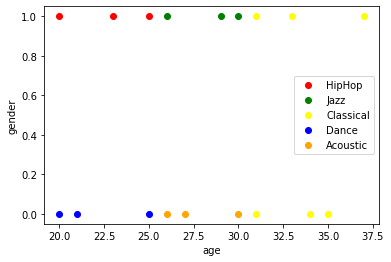

In [55]:
for i in range(5):
    x = df[df['genre'] == genre[i]]
    plt.scatter(x['age'], x['gender'], c = colors[i], label=genre[i])
    plt.xlabel("age") #for x axis
    plt.ylabel("gender") # for y axis
    plt.legend() #for labelling / display classes
  

we got some insight like classical is most common genre between both male and female above the age of 30 

In [56]:
df.isnull().sum() #to check null values

age       0
gender    0
genre     0
dtype: int64

since there are no null values we can easily move forward

Now we need to divide the data into two points — the input data and the output data. The input data will have the age and gender columns while the output will reserve what is to be predicted, the genre column. Thus, we train the model to accept two input values, age and gender and predict the result (genre) based on these values "as mentioned in the question". To create this input set, we drop the “MUSIC GENRE” column from the data frame, and we store the remaining columns of data (age and gender) as X;

In [12]:
## We create input set and output set for the train test split

In [14]:
X = df.drop(columns=['genre'])
y = df['genre']

In [16]:
print (X.head)

<bound method NDFrame.head of     age  gender
0    20       1
1    23       1
2    25       1
3    26       1
4    29       1
5    30       1
6    31       1
7    33       1
8    37       1
9    20       0
10   21       0
11   25       0
12   26       0
13   27       0
14   30       0
15   31       0
16   34       0
17   35       0>


In [17]:
print (y.head)

<bound method NDFrame.head of 0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object>


We split the individual input and output sets into training set and test set each

In [18]:
#i am going to split train & test data in 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

i am going to use decison tree algorithm for this classification and fit the data (the input training data and the output training data)

In [43]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
print("Accuracy: ",model.score(X_test, y_test) * 100)

Accuracy:  75.0


We make predictions with the input test data - the predictions are stored in a new set, y prediction, which we will check if it is accurate by comparing it with the expected data which we have in the output test set (y_test)

In [58]:
y_prediction = model.predict(X_test)
print(y_prediction)

['Classical' 'HipHop' 'Classical' 'Jazz']


# We are comparing the prediction, y_prediction, with the actual values that we stored in y_test to see if the model guessed right

In [45]:
prediction_accuracy = accuracy_score(y_test, y_prediction)*100
prediction_accuracy

100.0

as we can see the model predicted it 100% accurately all the values have matched

# importing pickle for giving random input in form of age & gender & then predicting the genre

In [22]:
#save the model 
import pickle
filename = 'savedmodel.sav'
pickle.dump(model, open(filename, 'wb'))

In [23]:
load_model= pickle.load(open(filename,'rb'))

In [60]:
load_model.predict([[26,1]])

array(['Jazz'], dtype=object)

In [ ]:
##as we can see above on giving age as 26 and gender as male i.e 1 we get genre as Jazz predicted.